In [1]:
import numpy as np
from hermite_function import *

##Test visualizations

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

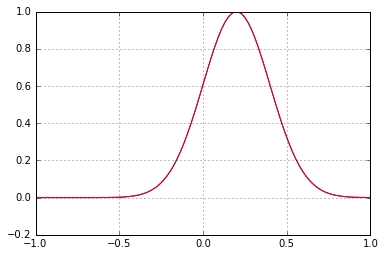

In [3]:
h_test = hermite_function_series(M=[1,],deg=[20,])
mu_x = 0.2
sigma_x = 0.2
h_test.interpolate( lambda x : np.exp( -(x-mu_x)**2 / (2.0*sigma_x**2) ) )
x_span = np.linspace(-1,1,100)
plt.plot( x_span , h_test.evaluate_on_grid([x_span]) ,'b-')
plt.plot( x_span , np.exp( - (x_span-mu_x)**2 / (2.0*sigma_x**2) ), 'r-')
plt.grid(True)

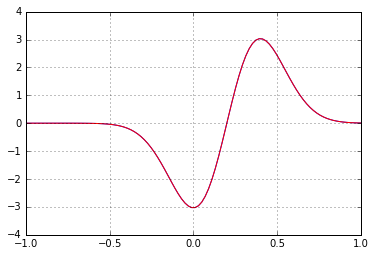

In [4]:
FP_op_1d = FP_operator(deg=[20,], M=[1,], sigma=[0,], polynomials=[np.array([1,]),])
dh_test = FP_op_1d.dot( h_test)
x_span = np.linspace(-1,1,100)
plt.plot( x_span , dh_test.evaluate_on_grid([x_span]) ,'b-')
plt.plot( x_span , ( (x_span-mu_x) / (sigma_x**2)) * np.exp( - (x_span-mu_x)**2 / (2.0*sigma_x**2) ), 'r-')
plt.grid(True)

0.998149678129


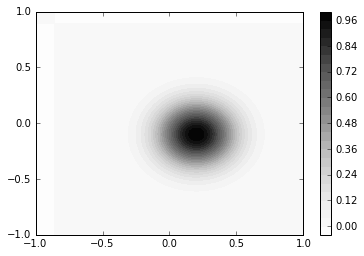

In [5]:
h_other = hermite_function_series(M=1,deg=10)
mu_y = -0.1
sigma_y = 0.2
h_other.interpolate( lambda x : np.exp( -(x-mu_y)**2 / (2.0*sigma_y**2) ) )
h_2d = h_test.kron( h_other )
x_grid,y_grid = np.meshgrid( x_span , x_span )
h_2d_on_grid = h_2d.evaluate_on_grid([x_grid,y_grid])
cs=plt.contourf( x_grid, y_grid, h_2d_on_grid,
            30, cmap='Greys')
plt.colorbar(cs)
print h_2d_on_grid.max()

#Straightup Linear + Noise
We consider the Lagrangian $L(x,\dot{x}) = \frac{1}{2} \| \dot{x} \|^2$ and add noise to space.  This gives the SDE
$$
    dx = v dt + \sigma dW \quad,\quad dv = 0.
$$
This yields the Fokker-Planck equation
$$
    \partial_t \rho = - v \partial_x \rho + \frac{1}{2} \sigma^2 \partial_x^2 \rho
$$

In [6]:
#hyper parameters
deg = [20, 20, 20, 20]
M = [1, 1, 2, 2]
sigma = ( 0.0, 0.0, 0.0, 0.0)

#initialize with a Gaussian
gaussian = lambda x,mu,s: np.exp( -(x-mu)/(2*s**2)) / (s*np.sqrt(2*np.pi))
sigma_init = [0.3, 0.3, 0.3, 0.3]
mu_init = [0.0, 0.0, 0.0, 1.0]
h_x = hermite_function_series(M=M[0], deg=deg[0])
h_x.interpolate( lambda x: np.exp( -(x-mu_init[0])**2 / (2*sigma_init[0]**2) ) )
h_y = hermite_function_series(M=M[1], deg=deg[1])
h_y.interpolate( lambda x: np.exp( -(x-mu_init[1])**2 / (2*sigma_init[1]**2) ) )
h_u = hermite_function_series(M=M[2], deg=deg[2])
h_u.interpolate( lambda x: np.exp( -(x-mu_init[2])**2 / (2*sigma_init[2]**2) ) )
h_v = hermite_function_series(M=M[3], deg=deg[3])
h_v.interpolate( lambda x: np.exp( -(x-mu_init[3])**2 / (2*sigma_init[3]**2) ) )

h_init = h_x.kron(h_y).kron(h_u).kron(h_v)

In [7]:
p_x = np.zeros( [1, 1, 2, 1] )
p_y = np.zeros( [1, 1, 1, 2] )
p_u = np.zeros( [1, 1, 1, 1] )
p_v = np.zeros( [1, 1, 1, 1] )

p_x[0,0,1,0] = 1.0
p_y[0,0,0,1] = 1.0
polys = [p_x,p_y,p_u,p_v]
FP_op = FP_operator(deg=deg, M=M, sigma=sigma, polynomials=polys)

## Initial conidition
marginalized by $u$ and $v$

In [8]:
h_init_xy = h_init.marginalize(3).marginalize(2)
x_span = np.linspace(-M[0], M[0], 50)
y_span = np.linspace(-M[1], M[1], 50)
x_grid,y_grid = np.meshgrid(x_span,y_span)
h_grid_xy = h_init_xy.evaluate_on_grid([x_grid,y_grid])

h_init_uv = h_init.marginalize(1).marginalize(0)
u_span = np.linspace(-M[2], M[2], 50)
v_span = np.linspace(-M[3], M[3], 50)
u_grid,v_grid = np.meshgrid(u_span,v_span)
h_grid_uv = h_init_uv.evaluate_on_grid([u_grid,v_grid])

(-1.0, 1.0, -1.0, 1.0)

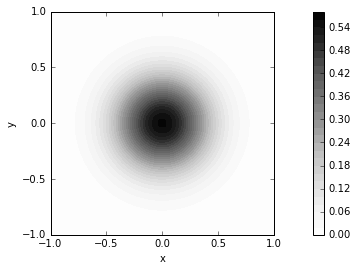

In [9]:
cs= plt.contourf( x_grid, y_grid, h_grid_xy , 30,
            cmap='Greys')
plt.colorbar(cs)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')

(-2.0, 2.0, -2.0, 2.0)

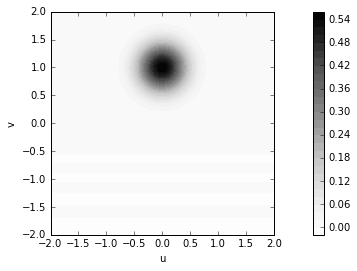

In [10]:
cs= plt.contourf( u_grid, v_grid, h_grid_uv , 30,
            cmap='Greys')
plt.colorbar(cs)
plt.xlabel('u')
plt.ylabel('v')
plt.axis('square')

In [11]:
h_final = FP_op.advect(h_init, 0.25)

(-1.0, 1.0, -1.0, 1.0)

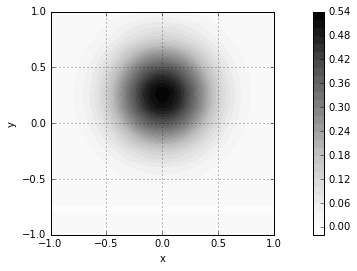

In [12]:
h_final_xy = h_final.marginalize(3).marginalize(2)
h_final_grid_xy = h_final_xy.evaluate_on_grid( [x_grid, y_grid] )
cs= plt.contourf( x_grid, y_grid, h_final_grid_xy , 30,
            cmap='Greys')
plt.colorbar(cs)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('square')

## Harmonic Oscillator

In [13]:
#hyper parameters
deg = [20, 20, 20, 20]
M = [1, 1, 2, 2]
sigma = ( 0.0, 0.0, 0.0, 0.0)

#initialize with a Gaussian
gaussian = lambda x,mu,s: np.exp( -(x-mu)/(2*s**2)) / (s*np.sqrt(2*np.pi))
sigma_init = [0.3, 0.3, 0.3, 0.3]
mu_init = [0.5, 0.5, 0.0, 0.0]
h_x = hermite_function_series(M=M[0], deg=deg[0])
h_x.interpolate( lambda x: np.exp( -(x-mu_init[0])**2 / (2*sigma_init[0]**2) ) )
h_y = hermite_function_series(M=M[1], deg=deg[1])
h_y.interpolate( lambda x: np.exp( -(x-mu_init[1])**2 / (2*sigma_init[1]**2) ) )
h_u = hermite_function_series(M=M[2], deg=deg[2])
h_u.interpolate( lambda x: np.exp( -(x-mu_init[2])**2 / (2*sigma_init[2]**2) ) )
h_v = hermite_function_series(M=M[3], deg=deg[3])
h_v.interpolate( lambda x: np.exp( -(x-mu_init[3])**2 / (2*sigma_init[3]**2) ) )

h_init = h_x.kron(h_y).kron(h_u).kron(h_v)

In [14]:
p_x = np.zeros( [1, 1, 2, 1] )
p_y = np.zeros( [1, 1, 1, 2] )
p_u = np.zeros( [2, 1, 1, 1] )
p_v = np.zeros( [1, 2, 1, 1] )

p_x[0,0,1,0] = 1.0
p_y[0,0,0,1] = 1.0
p_u[1,0,0,0] = -1.0
p_v[0,1,0,0] = -1.0
polys = [p_x,p_y,p_u,p_v]
FP_op = FP_operator(deg=deg, M=M, sigma=sigma, polynomials=polys)

In [15]:
h_final = FP_op.advect(h_init, 1.0)

(-1.0, 1.0, -1.0, 1.0)

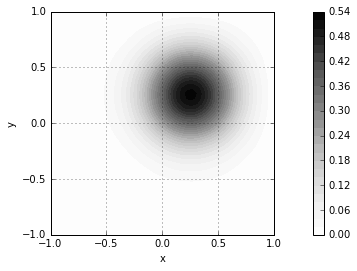

In [16]:
h_final_xy = h_final.marginalize(3).marginalize(2)
h_final_grid_xy = h_final_xy.evaluate_on_grid( [x_grid, y_grid] )
cs= plt.contourf( x_grid, y_grid, h_final_grid_xy , 30,
            cmap='Greys')
plt.colorbar(cs)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('square')

## Our model
Finally, we test on our model. The Euler-Lagrange equations are
$$
    \dot{x} = u \\
    \dot{y} = v \\
    \dot{u} = \Delta \phi (x,y) \\
    \dot{v} = - \Delta \phi (x,y)
$$
So the Fokker-Planck equation is given by
$$
    \partial_t \rho = - u \partial_x \rho - v \partial_y \rho -
    \Delta \phi \cdot \partial_u \rho + \Delta \phi \cdot \partial_v \rho 
    + \frac{\sigma^2}{2} \Delta \rho
$$
We will either set $\sigma = 0$ or sample sigma from trajectory data.

In [3]:
#LOAD TRAJECTORIES
import numpy as np
import process_data
process_data = reload(process_data)
folder = '../annotations/coupa/video2/'
fname = folder + 'annotations.txt'
x_raw,y_raw = process_data.get_trajectories(fname,label="Biker")

from PIL import Image
fname = folder + 'reference.jpg'
im = Image.open(fname)
width,height = im.size
print "width = %f, height = %f" % (width,height)
x_transformed = map( lambda x: x-width/2 , x_raw )
y_transformed = map( lambda x: -height/2-x , y_raw )
domain = (-width/2,width/2,-height/2,height/2)

width = 1980.000000, height = 1093.000000


x = -150.000000
y = -448.500000
u = 0.469155
v = 0.883116
unormalized speed = 3.019612


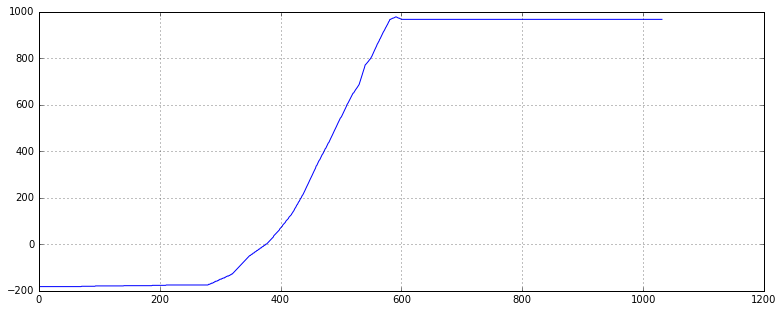

In [4]:
#CHOOSE A TEST TRAJECTORY AND ESTIMATE AN INITIAL POSITION AND (normalized) VELOCITY
curve_index = 6
plt.figure( figsize = (13,5))
plt.plot( x_transformed[curve_index] )
plt.grid(True)
start_index = 300
fd_width = 3
x_init = x_transformed[curve_index][start_index]
y_init = y_transformed[curve_index][start_index]
u_init = (x_transformed[curve_index][start_index+fd_width] - x_transformed[curve_index][start_index-fd_width])/float(2*fd_width)
v_init = (y_transformed[curve_index][start_index+fd_width] - y_transformed[curve_index][start_index-fd_width])/float(2*fd_width)
speed = np.sqrt( u_init**2 + v_init**2)
u_init = u_init / speed
v_init = v_init / speed
print "x = %f" % x_init
print "y = %f" % y_init
print "u = %f" % u_init
print "v = %f" % v_init
print "unormalized speed = %f" % speed

In [115]:
#NUMERIC PARAMETERS
deg = [10, 10, 10, 10]
M = [width, height, 1.5, 1.5]
sigma = ( 0.0, 0.0, 0.0, 0.0)

#INITIALIZE DENSITY WITH A GAUSSIAN
gaussian = lambda x,mu,s: np.exp( -(x-mu)/(2*s**2)) / (s*np.sqrt(2*np.pi))
sigma_init = [np.sqrt(width*height)/8, np.sqrt(width*height)/8, 0.15, 0.15]
mu_init = [x_init, y_init, u_init, v_init]
h_x = hermite_function_series(M=M[0], deg=deg[0])
h_x.interpolate( lambda x: np.exp( -(x-mu_init[0])**2 / (2*sigma_init[0]**2) ) )
h_y = hermite_function_series(M=M[1], deg=deg[1])
h_y.interpolate( lambda x: np.exp( -(x-mu_init[1])**2 / (2*sigma_init[1]**2) ) )
h_u = hermite_function_series(M=M[2], deg=deg[2])
h_u.interpolate( lambda x: np.exp( -(x-mu_init[2])**2 / (2*sigma_init[2]**2) ) )
h_v = hermite_function_series(M=M[3], deg=deg[3])
h_v.interpolate( lambda x: np.exp( -(x-mu_init[3])**2 / (2*sigma_init[3]**2) ) )
h_init = h_x.kron(h_y).kron(h_u).kron(h_v)

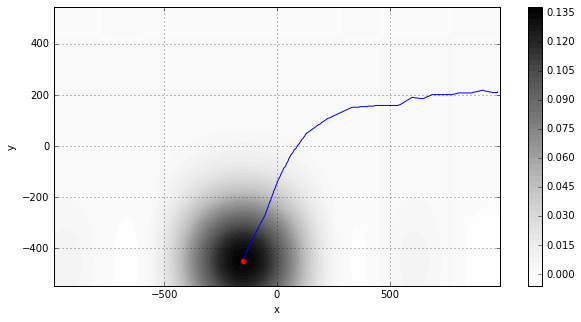

In [116]:
h_init_xy = h_init.marginalize(3).marginalize(2)
x_grid,y_grid = np.meshgrid( np.linspace(-width/2,width/2,50), np.linspace(-height/2,height/2,50))
h_init_grid_xy = h_init_xy.evaluate_on_grid( [x_grid, y_grid] )
plt.figure( figsize = (10,5))
cs= plt.contourf( x_grid, y_grid, h_init_grid_xy , 50,
            cmap='Greys')
plt.colorbar(cs)
plt.plot( x_transformed[curve_index][start_index:], y_transformed[curve_index][start_index:] , 'b-')
plt.plot( x_transformed[curve_index][start_index], y_transformed[curve_index][start_index],'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

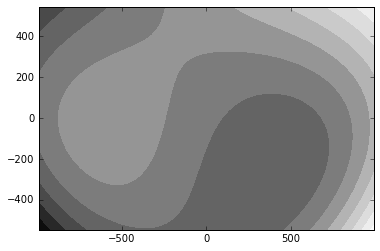

In [117]:
#INITIALIZE FP OPERATOR
theta_herm = np.load('theta_opt_magnetic.npy')
from numpy.polynomial.hermite import herm2poly, hermval2d
theta_poly = np.zeros_like(theta_herm)
for k in range( theta_poly.shape[0] ):
    theta_poly[k,:] = herm2poly( theta_herm[k,:] )
for k in range( theta_poly.shape[1]):
    theta_poly[:,k] = herm2poly( theta_poly[:,k])

#phi = theta_poly[i,j] alpha_x*x^i * alpha_y*y^j
k_max = theta_herm.shape[0]-1
alpha_x = np.sqrt(2*k_max) / (width/2)
alpha_y = np.sqrt(2*k_max) / (height/2)
theta_poly = theta_poly * np.outer( alpha_x**np.arange(k_max+1), alpha_y**np.arange(k_max+1) )
#Now phi = theta_poly[i,j] x^i y^j

Laplace_theta = np.zeros_like(theta_poly)
from numpy.polynomial.polynomial import polyder
m,n = theta_poly.shape
Laplace_theta[:m-2,:n] = polyder( theta_poly , m=2, axis = 0)
Laplace_theta[:m,:n-2] += polyder( theta_poly, m=2, axis = 1)

from numpy.polynomial.polynomial import polyval2d
x_grid,y_grid = np.meshgrid( np.linspace(-width/2, width/2,50), np.linspace(-height/2,height/2,50))
plt.contourf( x_grid, y_grid, polyval2d(x_grid,y_grid,Laplace_theta), 10, cmap='Greys')

In [118]:
p_x = np.zeros( [1, 1, 2, 1] )
p_y = np.zeros( [1, 1, 1, 2] )
p_u = np.zeros( [m, n, 1, 1] )
p_v = np.zeros( [m, n, 1, 1] )

p_x[0,0,1,0] = 1.0
p_y[0,0,0,1] = 1.0
p_u[:m,:n,0,0] = Laplace_theta
p_v[:m,:n,0,0] = -Laplace_theta
polys = [p_x,p_y,p_u,p_v]
%time FP_op = FP_operator(deg=deg, M=M, sigma=sigma, polynomials=polys)

CPU times: user 199 ms, sys: 45.8 ms, total: 245 ms
Wall time: 242 ms


In [119]:
%time dh_init = FP_op.dot(h_init)

CPU times: user 2.53 ms, sys: 618 µs, total: 3.15 ms
Wall time: 2.46 ms


In [122]:
from scipy.sparse.linalg import expm_multiply
n_steps = 150
%time coeffs_final = expm_multiply( FP_op.op, h_init.coeffs.flatten(),start=0.0, stop=n_steps*speed , num=3)

print "real time = %f seconds" % float(n_steps / 30)

h_final = hermite_function_series( coeffs = coeffs_final[-1], M = h_init.M, deg = h_init.deg )

CPU times: user 7.36 s, sys: 36.4 ms, total: 7.4 s
Wall time: 7.41 s
real time = 5.000000 seconds


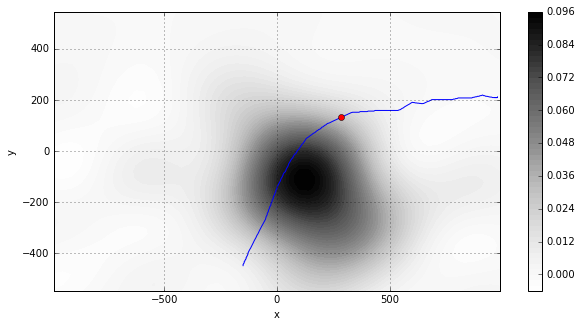

In [123]:
h_final_xy = h_final.marginalize(3).marginalize(2)
x_grid,y_grid = np.meshgrid( np.linspace(-width/2,width/2,50), np.linspace(-height/2,height/2,50))
h_final_grid_xy = h_final_xy.evaluate_on_grid( [x_grid, y_grid] )
plt.figure( figsize=(10,5))
cs= plt.contourf( x_grid, y_grid, h_final_grid_xy , 50,
            cmap='Greys')
plt.colorbar(cs)
plt.plot( x_transformed[curve_index][start_index:], y_transformed[curve_index][start_index:] , 'b-')
plt.plot( x_transformed[curve_index][start_index+n_steps], y_transformed[curve_index][start_index+n_steps] , 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)